# Naive Bayes Classifier


## Load processed data

In [9]:
import pandas as pd 

# Load the data
data = pd.read_csv(r"../resources/processed_data.csv")
data.head()

,Processed_Review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [10]:

label_counts = data['sentiment'].value_counts()

label_ratios = label_counts / len(data) * 100 

print("Tỷ lệ các nhãn:")
print(label_ratios)

Tỷ lệ các nhãn:
sentiment
positive    50.187568
negative    49.812432
Name: count, dtype: float64


### Chia tập dữ liệu

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Chuyển dữ liệu sang đặc trưng số sử dụng TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2)) 

In [13]:
# Chia data thành các tập train và test
X = tfidf.fit_transform(data['Processed_Review']).toarray()
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Các mô hình

### 1. Naive bayes

#### Sử dụng mô hình MultinomialNB, BernoulliNB, GaussianNB

In [14]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Danh sách các mô hình
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Huấn luyện và đánh giá từng mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Tính độ chính xác và báo cáo phân loại
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # In kết quả
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('\n' + '-' * 30 + '\n')

--- GaussianNB ---
Accuracy: 0.8366441464152465
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      5033
    positive       0.84      0.83      0.83      4884

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917


------------------------------

--- MultinomialNB ---
Accuracy: 0.8691136432388827
Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.85      0.87      5033
    positive       0.85      0.89      0.87      4884

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917


------------------------------

--- BernoulliNB ---
Accuracy: 0.8672985781990521
Classification Report:
              precision    recall  f1-score   support

    nega

##### Điều chỉnh siêu tham số cho mô hình Gaussian Naive Bayes
Trong mô hình Gaussian Naive Bayes của scikit-learn, giá trị mặc định cho siêu tham số `var_smoothing` là $10^{-9}$. Ở đây ta sẽ thử khảo sát độ chính xác mô hình cho các giá trị khác nhau của siêu tham số này. Ta thấy giá trị tốt nhất là $10^{-2}$ tuy nhiên độ chính xác đạt được chênh lệch không đáng kể với giá trị mặc định.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

parameters = {'var_smoothing': np.logspace(0, -9, num=10)}  # Các giá trị var_smoothing

gnb = GaussianNB()

clf = GridSearchCV(gnb, parameters, cv=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {clf.best_params_}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

mean_accuracy = clf.cv_results_['mean_test_score'] 
var_smoothing_values = parameters['var_smoothing']  

plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, mean_accuracy, marker='o')
plt.title('Model Accuracy vs. Variance Smoothing for GaussianNB')
plt.xlabel('Variance Smoothing (var_smoothing)')
plt.ylabel('Mean Accuracy')
plt.xscale('log')  
plt.xticks(var_smoothing_values, rotation=45)  
plt.grid()
plt.show()

KeyboardInterrupt: 

Best Parameters: {'alpha': 3.593813663804626}
Accuracy: 0.8642734697993345
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      5033
    positive       0.85      0.89      0.87      4884

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.87      0.86      0.86      9917



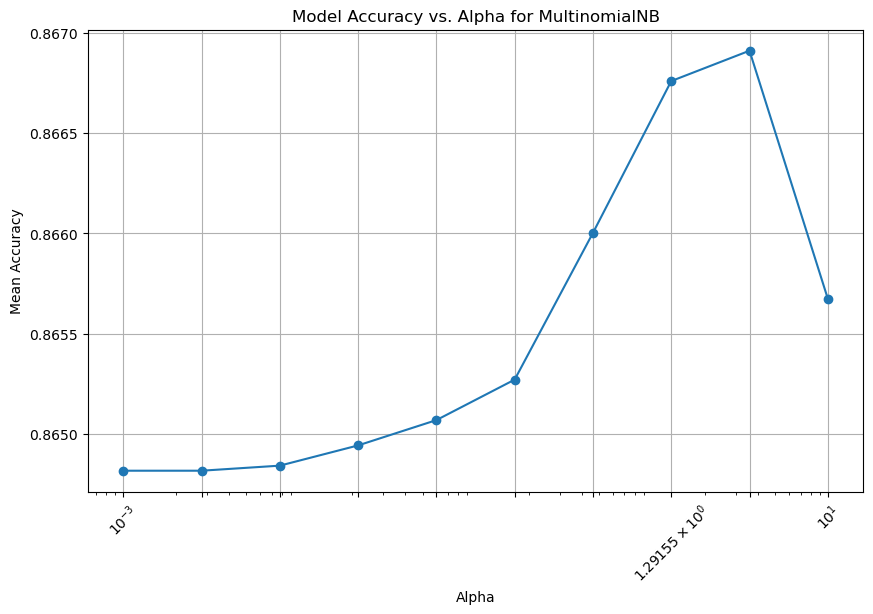

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Định nghĩa các giá trị của siêu tham số alpha
parameters = {'alpha': np.logspace(-3, 1, num=10)}

# Tạo mô hình Multinomial Naive Bayes
mnb = MultinomialNB()

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất
clf = GridSearchCV(mnb, parameters, cv=5)
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {clf.best_params_}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Vẽ biểu đồ độ chính xác trung bình so với các giá trị alpha
mean_accuracy = clf.cv_results_['mean_test_score']
alpha_values = parameters['alpha']

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_accuracy, marker='o')
plt.title('Model Accuracy vs. Alpha for MultinomialNB')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.xscale('log')
plt.xticks(alpha_values, rotation=45)
plt.grid()
plt.show()

### 2. LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8919
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      5044
    positive       0.88      0.91      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

